In [2]:
!pip install pandas matplotlib pyarrow

import os
import ast
import glob
import pandas as pd
import matplotlib.pyplot as plt

from functools import partial

  Using cached pyarrow-16.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached pyarrow-16.1.0-cp311-cp311-manylinux_2_28_x86_64.whl (40.8 MB)


In [4]:
dtype_spec = {
    'sent': int,
    'words': int,
    'sp_tokens': int,
    'tags_count': int
}

file_paths = glob.glob(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'map_articles*.csv'))
dfs = []

for file in file_paths:
    tmp_df = pd.read_csv(file, dtype=dtype_spec)
    tmp_df['tags'] = tmp_df['tags'].apply(ast.literal_eval)
    dfs.append(tmp_df)

df = pd.concat(dfs, ignore_index=True)
df['tags'] = df['tags'].apply(ast.literal_eval)

print(f'Number of samples: {df.shape[0]}')
print(f'And columns: {df.columns}')

Number of samples: 1068261
And columns: Index(['id', 'uuid', 'public', 'created', 'published', 'country',
       'mon_country', 'lang', 'script', 'm_id', 'rel_path', 'url', 'sent',
       'words', 'sp_tokens', 'tags_count', 'tags'],
      dtype='object')


Compute text length distributions

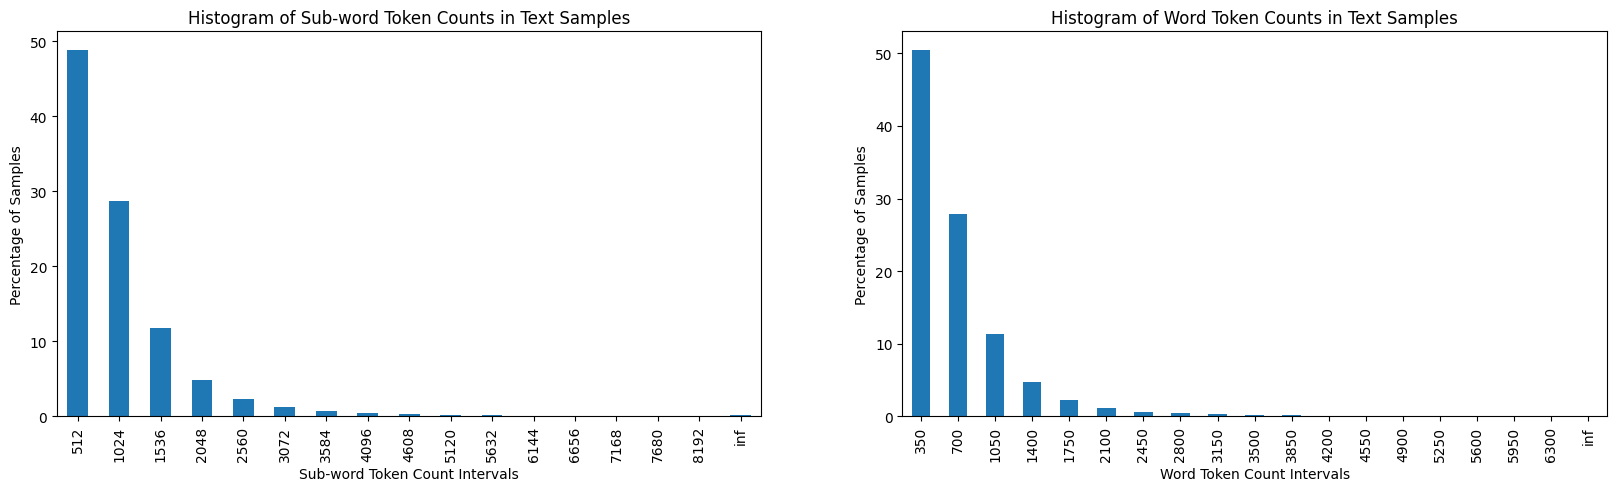

In [12]:
char_bins = [i for i in range(0, 8193, 512)]
char_bins.append(float('inf'))
char_histogram_counts = pd.cut(df['sp_tokens'], bins=char_bins).value_counts().sort_index()
char_histogram_percentages = (char_histogram_counts / df.shape[0]) * 100

word_bins = [i for i in range(0, 6401, 350)]
word_bins.append(float('inf'))
word_histogram_counts = pd.cut(df['words'], bins=word_bins).value_counts().sort_index()
word_histogram_percentages = (word_histogram_counts / df.shape[0]) * 100

sent_bins = [i for i in range(0, 201, 10)]
sent_bins.append(float('inf'))
sent_histogram_counts = pd.cut(df['sent'], bins=sent_bins).value_counts().sort_index()
sent_histogram_percentages = (sent_histogram_counts / df.shape[0]) * 100

#fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 2 columns
char_histogram_percentages.plot(
    ax=axs[0], kind='bar',
    title='Histogram of Sub-word Token Counts in Text Samples', 
    xlabel='Sub-word Token Count Intervals',
    ylabel='Percentage of Samples'
)
axs[0].set_xticklabels(char_bins[1:])

word_histogram_percentages.plot(
    ax=axs[1], kind='bar', 
    title='Histogram of Word Token Counts in Text Samples', 
    xlabel='Word Token Count Intervals',
    ylabel='Percentage of Samples'
)
axs[1].set_xticklabels(word_bins[1:])

# sent_histogram_percentages.plot(
#     ax=axs[2], kind='bar', 
#     title='Histogram of Sentence Counts in Text Samples', 
#     xlabel='Sentence Count Intervals',
#     ylabel='Percentage of Samples'
# )
# axs[2].set_xticklabels(sent_bins[1:])
plt.show()

Compute distribution by language

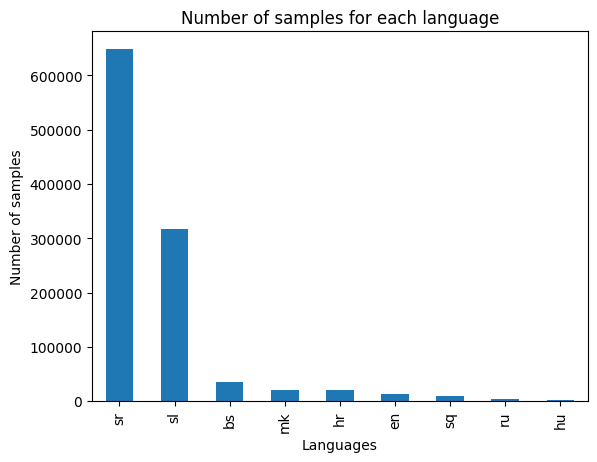

In [13]:
language_counts = df['lang'].value_counts()
filtered_language_counts = language_counts[language_counts > 100]
filtered_language_counts.plot(kind='bar')
plt.xlabel('Languages')
plt.ylabel('Number of samples')
plt.title('Number of samples for each language')
plt.show()